In [1]:
import numpy as np
import os as os
import matplotlib.pyplot as plt
from natsort import natsorted

In [2]:
os.chdir(r'/Users/sebastianredzic/Documents/Python V2024/maxwell' )

path = os.getcwd()

def FileNames(path):
    filelist = []

    pathExists = os.path.exists(path)
    isDir = os.path.isdir(path)

    if pathExists and isDir:
        for dirpaths, dirs, files in os.walk(path):
            for file in files:
                filelist.append(os.path.join(dirpaths, file))
    
    return natsorted(filelist)

def g(vi, B):
    return np.sqrt(B/np.pi) * np.exp(-B*vi**2)

def j(vi, B):
    return 2*B*vi*np.exp(-B*vi**2)

def calc_B(vs):
    return 1 / (np.sum(np.fromiter((vi**2 for vi in vs), dtype=float)) / len(v))


FileNotFoundError: [WinError 3] The system cannot find the path specified: '/Users/sebastianredzic/Documents/Python V2024/maxwell'

In [170]:
t, x, y = [], [], []  # Use Python lists for appending in loops

for file in FileNames(path):
    with open(file, 'r') as f:
        # Skip the first two lines
        n = 0
        for i in range(2):
            next(f)

        # Process the rest of the lines
        for line in f:
            n += 1
            column = line.split('\t')
            t.append(float(column[0]))  # Append directly to lists
            x.append(float(column[1]) * 0.0022)
            y.append(float(column[2]) * 0.0022)

        # After reading the entire file, append "END" markers
        t.append("END")
        x.append("END")
        y.append("END")

# Calculate velocities if needed
v_x, v_y, v = [], [], []

for i in range(len(t) - 1):
    if type(t[i]) == float and type(t[i+1]) == float:
        delta_t = t[i+1] - t[i]
        if delta_t != 0:  # Avoid division by zero
            v_x.append((x[i+1] - x[i]) / delta_t)
            v_y.append((y[i+1] - y[i]) / delta_t)
            v.append(np.sqrt(v_x[-1]**2 + v_y[-1]**2))

# Convert velocity lists to NumPy arrays
v_x = np.array(v_x)
v_y = np.array(v_y)
v = np.array(v)

t = np.array([val for val in t if type(val) == float])
x = np.array([val for val in x if type(val) == float])
y = np.array([val for val in y if type(val) == float])

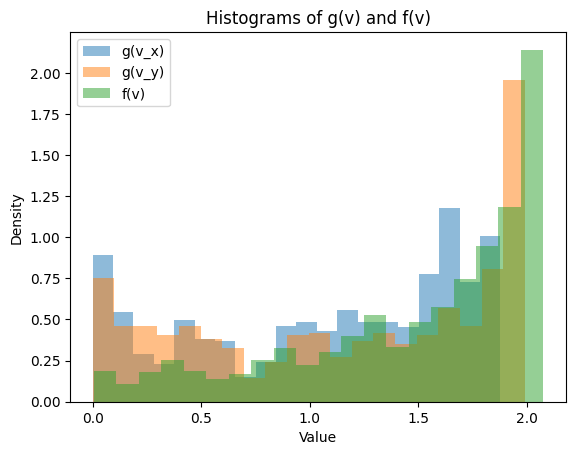

In [172]:
plt.hist(g(v_x, calc_B(v_x)), bins=20, density=True, alpha=0.5, label='g(v_x)')
plt.hist(g(v_y, calc_B(v_y)), bins=20, density=True, alpha=0.5, label='g(v_y)')
plt.hist(j(v, calc_B(v)), bins=20, density=True, alpha=0.5, label='f(v)')

plt.legend()
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histograms of g(v) and f(v)')
plt.show()